In [1]:
import sys
sys.path.insert(0,'python')
from classification import *
from readSent import *
import pylab as plt
import numpy as np
from fastRWpkl import *
import scipy.stats
import matplotlib.gridspec as gridspec
from scipy.stats import gaussian_kde
from scipy import optimize
from scipy import interpolate
%matplotlib inline 
import scipy.misc
from smoothn import *
import tifffile as tiff

In [2]:
bands = readfile([2, 4], 'data/50SMG20165100' )

data/50SMG20165100auxiliaryECMWFT
data/50SMG20165100metadata.xml


In [3]:
b2 = bands['B02']
b4 = bands['B04']

In [4]:
cm = parallel_rw_pkl(None, '0510diacm', 'r')
rr,cc = np.where(~cm)

In [5]:
def cost(p):
    p1, p2  = p
    tc = p1*b2[rr,cc]-p2*b4[rr,cc]
    cl = tc<tc.mean()
    clpix = [rr[cl], cc[cl]]
    r = scipy.stats.linregress(b4[clpix[0], clpix[1]],b2[clpix[0], clpix[1]])
    print p, r
    return 1-r.rvalue

In [6]:
p = np.array([14209.00539339, 6348.77515664])
psolve = optimize.fmin(cost, p, full_output=1)

[ 14209.00539339   6348.77515664] LinregressResult(slope=0.40080619338763357, intercept=0.093499938657073151, rvalue=0.97544190359958682, pvalue=0.0, stderr=1.1676322807549669e-05)
[ 14919.45566306   6348.77515664] LinregressResult(slope=0.39072733165976831, intercept=0.094750105977674054, rvalue=0.97498727614982938, pvalue=0.0, stderr=1.1334454971091729e-05)
[ 14209.00539339   6666.21391447] LinregressResult(slope=0.41007930092214928, intercept=0.092337066663327055, rvalue=0.97499895451282181, pvalue=0.0, stderr=1.2232592904645135e-05)
[ 13498.55512372   6666.21391447] LinregressResult(slope=0.41886812950454794, intercept=0.0912356223710169, rvalue=0.97371462343450255, pvalue=0.0, stderr=1.3012514307352035e-05)
[ 14564.23052822   6428.1348461 ] LinregressResult(slope=0.39833997097912766, intercept=0.093807996131756138, rvalue=0.9754156419664608, pvalue=0.0, stderr=1.1569064550890998e-05)
[ 14564.23052822   6110.69608827] LinregressResult(slope=0.3877007741636318, intercept=0.095121150

In [5]:
tc = 14209.00539339*b2[rr,cc]-6348.77515664*b4[rr,cc]
cl = tc<tc.mean()
clpix = [rr[cl], cc[cl]]

In [13]:
r = scipy.stats.linregress(b2[clpix[0], clpix[1]],b4[clpix[0], clpix[1]])
print r

LinregressResult(slope=2.3739326462397492, intercept=-0.21600886951737433, rvalue=0.97544190359958682, pvalue=0.0, stderr=6.9157623704851562e-05)


/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 117727836 but corresponding boolean dimension is 100000
  from ipykernel import kernelapp as app


LinregressResult(slope=2.4303850580176083, intercept=-0.21724089431474986, rvalue=0.97079941762980393, pvalue=0.0, stderr=0.0026578771407715007)


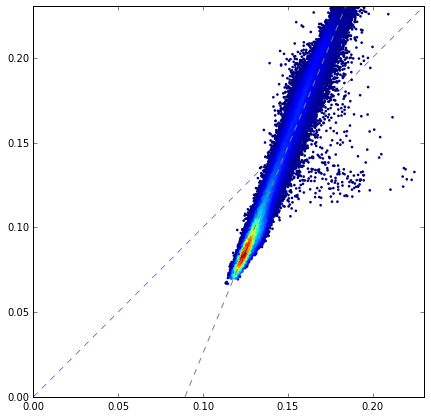

In [10]:
randcl = np.random.choice(cl, 100000)
clpix = [rr[randcl], cc[randcl]]
x,y = b4[clpix[0], clpix[1]],b2[clpix[0], clpix[1]]

dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

In [30]:
arc = np.arctan(2.43) # rad

In [31]:
hzpix = [rr[~cl], cc[~cl]]

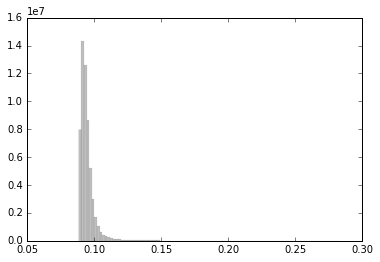

In [32]:
hot = np.sin(arc)*b2[hzpix[0], hzpix[1]] - np.cos(arc)*b4[hzpix[0], hzpix[1]]
hist = plt.hist(hot, 100, color='gray', alpha=0.5, linewidth=0.1)

0.085248512201


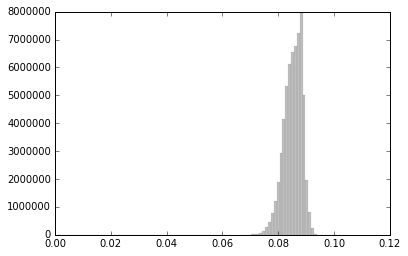

In [33]:
clhot = np.sin(arc)*b2[clpix[0], clpix[1]] - np.cos(arc)*b4[clpix[0], clpix[1]]
hist = plt.hist(clhot, 100, color='gray', alpha=0.5, linewidth=0.1)
print (clhot).mean()

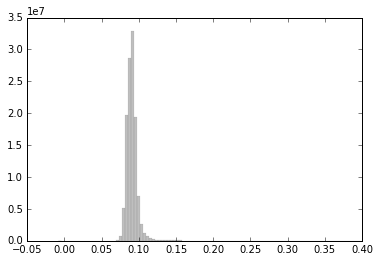

In [35]:
hot = np.sin(arc)*b2 - np.cos(arc)*b4
hist = plt.hist(hot.ravel(), 100, color='gray', alpha=0.5, linewidth=0.1)

In [36]:
ints = [0.084+i*0.001 for i in range(100)]
hzsen = b2[hzpix[0], hzpix[1]]
lbs = np.array([np.histogram(b2[hot>i])[1][0] for i in ints])

In [11]:
len(ints), len(lbs)

(100, 100)

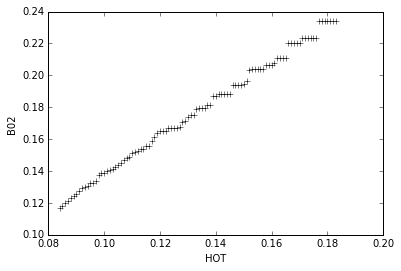

In [37]:
plt.plot(np.array(ints), lbs, '+k')
plt.xlabel('HOT')
plt.ylabel('B02')

In [38]:
adjust = lbs[lbs>0] - lbs[0]

In [39]:
adjust

array([ 0.    ,  0.0013,  0.0031,  0.0044,  0.0059,  0.0075,  0.0088,
        0.0103,  0.0122,  0.0129,  0.0136,  0.0153,  0.0153,  0.0165,
        0.0204,  0.0218,  0.0219,  0.023 ,  0.0238,  0.024 ,  0.0257,
        0.0268,  0.028 ,  0.0298,  0.0314,  0.0318,  0.0342,  0.0347,
        0.0358,  0.0368,  0.0368,  0.0384,  0.0384,  0.0417,  0.0446,
        0.0471,  0.0484,  0.0484,  0.0484,  0.0503,  0.0503,  0.0503,
        0.0503,  0.0505,  0.0535,  0.0542,  0.0572,  0.0581,  0.0581,
        0.0622,  0.0625,  0.0625,  0.0625,  0.0643,  0.0643,  0.0702,
        0.0702,  0.0716,  0.0716,  0.0716,  0.0716,  0.0716,  0.0768,
        0.0769,  0.0769,  0.0769,  0.0776,  0.0797,  0.0865,  0.0872,
        0.0872,  0.0872,  0.0872,  0.0872,  0.0895,  0.0895,  0.0895,
        0.0907,  0.0938,  0.0938,  0.0938,  0.0938,  0.1033,  0.1033,
        0.1033,  0.1033,  0.1033,  0.1064,  0.1064,  0.1064,  0.1064,
        0.1064,  0.1064,  0.1174,  0.1174,  0.1174,  0.1174,  0.1174,
        0.1174,  0.1

LinregressResult(slope=1.1840810081008104, intercept=-0.09730381458145819, rvalue=0.99850433271582906, pvalue=1.6118346963167558e-125, stderr=0.0065492032390932348)


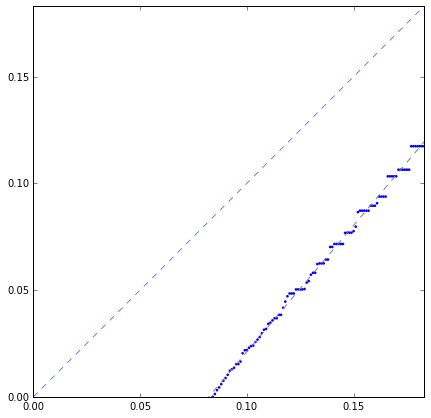

In [40]:
y,x = np.array(ints)[lbs>0], adjust
fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)

r = scipy.stats.linregress(y,x)
print r

In [41]:
test = np.zeros_like(b2)
test[:] = np.nan
#hz = test[rr[~cl], cc[~cl]]
test[hot>0.084] = hot[hot>0.084]*r.slope + r.intercept
test[hot<0.084] = 0
#test[rr[cl], cc[cl]] = 0

In [17]:
test[rr[~cl], cc[~cl]] = hz

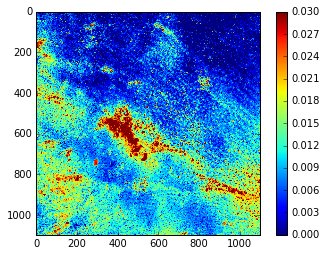

In [42]:
plt.imshow(test[::10,::10], vmax=0.03)
plt.colorbar()

In [43]:
corrected = b2-test

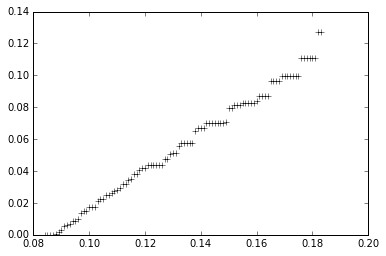

In [57]:
plt.plot(np.array(ints), adjust, '+k')

In [155]:
ints

array([ 0.082,  0.083,  0.084,  0.085,  0.086,  0.087,  0.088,  0.089,
        0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,  0.096,  0.097,
        0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,  0.104,  0.105,
        0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,  0.112,  0.113,
        0.114,  0.115,  0.116,  0.117,  0.118,  0.119,  0.12 ,  0.121,
        0.122,  0.123,  0.124,  0.125,  0.126,  0.127,  0.128,  0.129,
        0.13 ,  0.131,  0.132,  0.133,  0.134,  0.135,  0.136,  0.137,
        0.138,  0.139,  0.14 ,  0.141,  0.142,  0.143,  0.144,  0.145,
        0.146,  0.147,  0.148,  0.149,  0.15 ,  0.151,  0.152,  0.153,
        0.154,  0.155,  0.156,  0.157,  0.158,  0.159,  0.16 ,  0.161,
        0.162,  0.163,  0.164,  0.165,  0.166,  0.167,  0.168,  0.169,
        0.17 ,  0.171,  0.172,  0.173,  0.174,  0.175,  0.176,  0.177,
        0.178,  0.179,  0.18 ,  0.181])

In [159]:
x0 = np.where(hot<=0.082)

In [103]:
ints = np.array(ints)
adjs = []
for j, i in enumerate(ints):
    if j ==0:
        x = np.where((hot<=i))
        adjs.append([x,adjust[j]])             
    
    elif j<len(ints)-1:
        x= np.where((hot>=i)&(hot<ints[j+1]))
        adjs.append([x,adjust[j]])
    else:
        x = np.where((hot>=i))
        adjs.append([x,adjust[j]])                       

In [81]:
hzpix = [rr[~cl], cc[~cl]]

In [104]:
x,y = rr[~cl], cc[~cl]
adjimg = [[x[i[0]], y[i[0]], i[1]] for i in adjs]
hzadj = np.zeros_like(b2)
hzadj[:] = np.nan
for i in adjimg:
    hzadj[i[0], i[1]] = i[2]

In [107]:
hzadj[rr[cl], cc[cl]] = 0

<matplotlib.colorbar.Colorbar instance at 0x7fd2852c06c8>

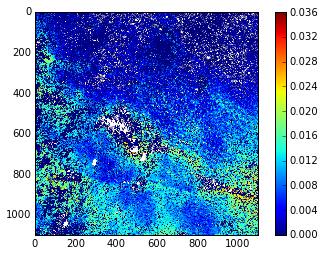

In [108]:
plt.imshow(hzadj[::10,::10])
plt.colorbar()

In [111]:
parallel_rw_pkl(hzadj, 'hzadj', 'w')

In [112]:
corrected = b2-hzadj

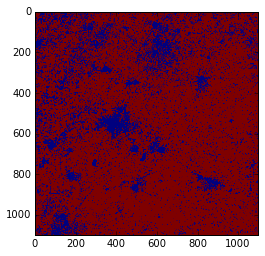

In [30]:
plt.imshow(veg[::10,::10])

In [31]:
veg[rr[~cl], cc[~cl]] = 0

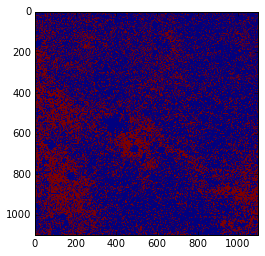

In [32]:
plt.imshow(veg[::10,::10])

In [71]:
cm = parallel_rw_pkl(None, '0510diacm', 'r')

In [73]:
hzpix = np.where(~(veg|cm))

0.0832330428264


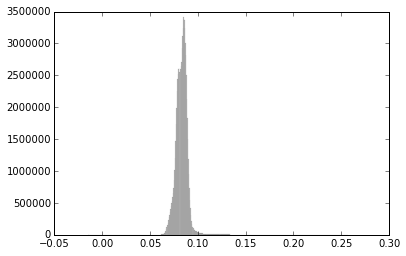

In [74]:
hot = np.sin(arc)*b2[hzpix[0], hzpix[1]] - np.cos(arc)*b4[hzpix[0], hzpix[1]]
hist = plt.hist(hot, 500, color='gray', alpha=0.5, linewidth=0.1)
print hot.mean()

In [82]:
hot.max()

0.25685576358663081

In [83]:
ints = [0.078+i*0.001 for i in range(180)]

In [84]:
ints

[0.078,
 0.079,
 0.08,
 0.081,
 0.082,
 0.083,
 0.084,
 0.085,
 0.086,
 0.087,
 0.088,
 0.089,
 0.09,
 0.091,
 0.092,
 0.093,
 0.094,
 0.095,
 0.096,
 0.097,
 0.098,
 0.099,
 0.1,
 0.101,
 0.10200000000000001,
 0.10300000000000001,
 0.10400000000000001,
 0.105,
 0.106,
 0.107,
 0.108,
 0.109,
 0.11,
 0.111,
 0.112,
 0.113,
 0.114,
 0.11499999999999999,
 0.11599999999999999,
 0.11699999999999999,
 0.118,
 0.119,
 0.12,
 0.121,
 0.122,
 0.123,
 0.124,
 0.125,
 0.126,
 0.127,
 0.128,
 0.129,
 0.13,
 0.131,
 0.132,
 0.133,
 0.134,
 0.135,
 0.136,
 0.137,
 0.138,
 0.139,
 0.14,
 0.14100000000000001,
 0.14200000000000002,
 0.14300000000000002,
 0.14400000000000002,
 0.14500000000000002,
 0.14600000000000002,
 0.14700000000000002,
 0.14800000000000002,
 0.14900000000000002,
 0.15000000000000002,
 0.151,
 0.152,
 0.153,
 0.154,
 0.155,
 0.156,
 0.157,
 0.158,
 0.159,
 0.16,
 0.161,
 0.162,
 0.163,
 0.164,
 0.165,
 0.16599999999999998,
 0.16699999999999998,
 0.16799999999999998,
 0.168999999999

In [85]:
hzsen = b2[hzpix[0], hzpix[1]]

In [86]:
lbs = np.array([np.histogram(hzsen[hot>i])[1][0] for i in ints])

In [87]:
lb = lbs[lbs>0]

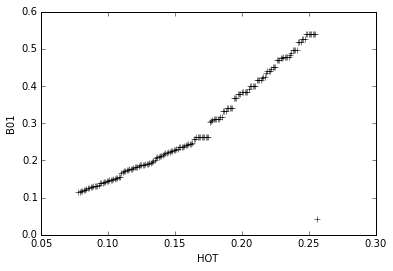

In [88]:
plt.plot(np.array(ints)[lbs>0], lb, '+k')
plt.xlabel('HOT')
plt.ylabel('B02')

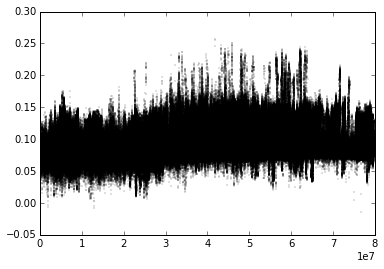

In [89]:
plt.plot(hot, 'k+', markersize=0.5)

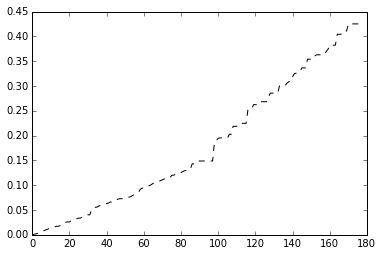

In [95]:
adjust = lb-lb[0]
plt.plot(adjust[:-1], 'k--')

In [98]:
ints = np.array(ints)[lbs>0][:-1]
adjs = []
for j, i in enumerate(ints):
    if j<len(ints)-1:
        x= np.where((hot>i)&(hot<ints[j+1]))
        adjs.append([x,adjust[j]])
    else:
        x = np.where((hot>i))
        adjs.append([x,adjust[j]])                       

In [99]:
x,y = np.where(~(veg|cm))
adjimg = [[x[i[0]], y[i[0]], i[1]] for i in adjs]

In [100]:
hzadj = np.zeros_like(b2)
hzadj[:] = np.nan
for i in adjimg:
    hzadj[i[0], i[1]] = i[2]

In [111]:
parallel_rw_pkl(hzadj, 'hzadj', 'w')

<matplotlib.colorbar.Colorbar instance at 0x7fdc225470e0>

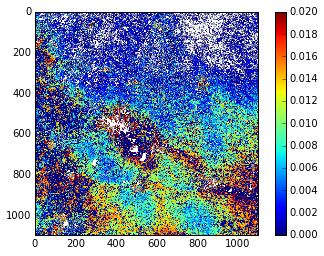

In [108]:
clx, cly = np.where(veg)
hzadj[clx, cly] = 0
plt.imshow(hzadj[::10,::10], vmax =0.02)
plt.colorbar()

In [110]:
smhz = smoothn(hzadj, isrobust=True)

./python/smoothn.py:256: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Lambda = Lambda + (cos(pi*(arange(1,sizy[i]+1) - 1.)/sizy[i]).reshape(siz0))


<matplotlib.colorbar.Colorbar instance at 0x7fdde0777830>

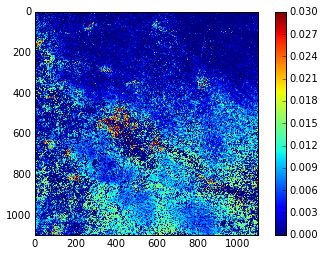

In [118]:
plt.imshow(smhz[0][::10,::10], vmin = 0., vmax = 0.03)
plt.colorbar()

In [121]:
smhz[0][smhz[0]<0] = 0

<matplotlib.colorbar.Colorbar instance at 0x7fdde02da3b0>

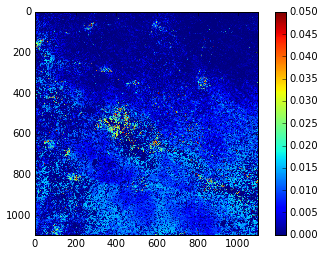

In [125]:
plt.imshow(smhz[0][::10,::10], vmax = 0.05)
plt.colorbar()

In [127]:
parallel_rw_pkl(smhz[0], 'smhz', 'w')

In [132]:
corrected = b2-smhz[0]

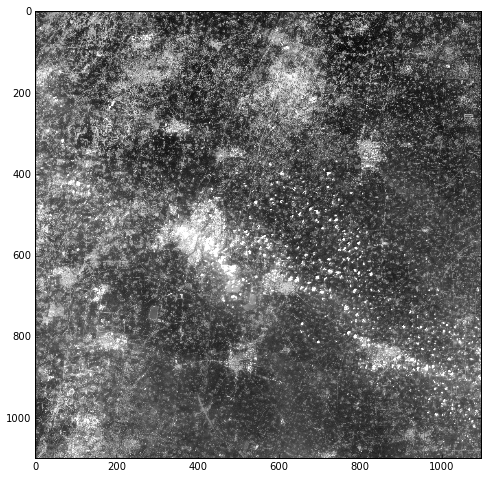

In [212]:
plt.figure(figsize = (8,8))
plt.imshow(b2[::10,::10]*0.001, vmax = 0.2, cmap = 'gray')

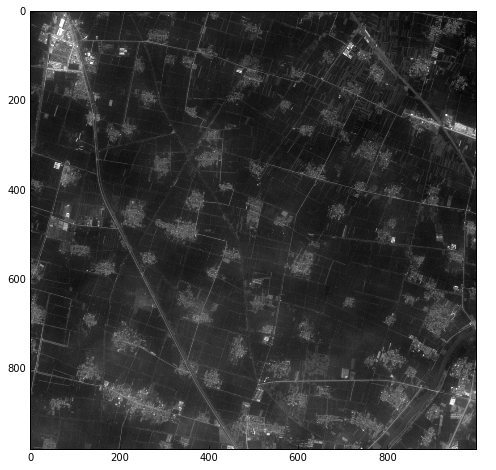

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(b2[10000:,6000:7000], vmax = 0.2,  cmap = 'gray')

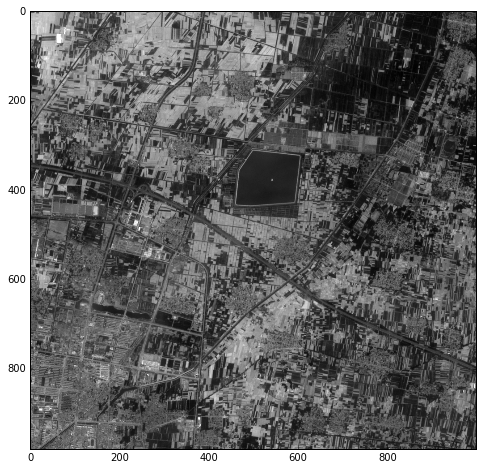

In [48]:
plt.figure(figsize=(8,8))
plt.imshow(corrected[10000:,1000:2000], vmax = 0.2,  cmap = 'gray')

In [45]:
corrected

array([[ 0.1366    ,  0.1339    ,  0.13361641, ...,  0.1669    ,
         0.1596    ,  0.1581    ],
       [ 0.1371    ,  0.1356    ,  0.1358    , ...,  0.1536    ,
         0.1597    ,  0.1634    ],
       [ 0.1382    ,  0.1352    ,  0.1354    , ...,  0.1401    ,
         0.1497    ,  0.1557    ],
       ..., 
       [ 0.13013188,  0.12978368,  0.12902215, ...,  0.13875688,
         0.14524121,  0.1503    ],
       [ 0.13002917,  0.12886308,  0.12906849, ...,  0.13783501,
         0.14487549,  0.1493    ],
       [ 0.12932651,  0.1292551 ,  0.1291712 , ...,  0.13491034,
         0.14044404,  0.14007953]])

In [49]:
tiff.imsave('corband2.tif', corrected)

In [43]:
im = tiff.imread('corband2.tif', key=0)

In [51]:
data = parallel_rw_pkl(None, 'rmhazeb2_modis', 'r')

In [52]:
data = np.array(data)

In [53]:
a = []
for i in data:
    a+=i

In [54]:
a = np.array(a).T

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.3392881881219763, intercept=-0.14109951230298695, rvalue=0.91862020147303569, pvalue=0.0, stderr=0.0030276563700320307)


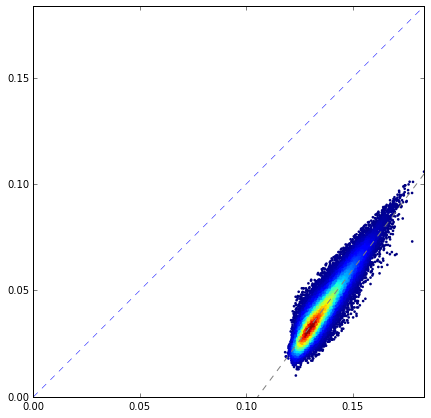

In [55]:
y,x = a[0], a[1]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

LinregressResult(slope=1.2637690029363138, intercept=-0.13302553745946516, rvalue=0.93463702747067701, pvalue=0.0, stderr=0.0079872314079321455)


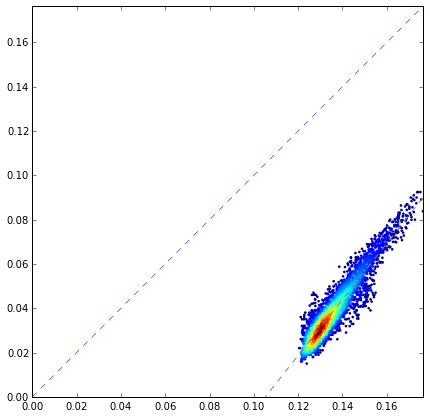

In [25]:
data = parallel_rw_pkl(None, 'partrmhzb2_modis', 'r')
data = np.array(data)
a = []
for i in data:
    a+=i
a = np.array(a).T
y,x = a[0], a[1]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r

/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less
/data/store01/data_dirs/students/ucfafyi/.conda/envs/gdal_env/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in greater


LinregressResult(slope=1.3599391086916743, intercept=-0.14346829640698933, rvalue=0.944818730570268, pvalue=0.0, stderr=0.0034023313627934313)


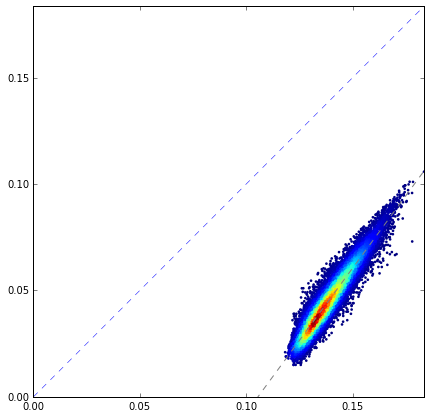

In [50]:
data = parallel_rw_pkl(None, 'partrmhzb2_modis', 'r')
data = np.array(data)
a = []
for i in data:
    a+=i
a = np.array(a).T
y,x = a[0], a[1]
dif = x-y
sigma = np.nanstd(dif)
mean = np.nanmean(dif)

Thr_sigma = 3.*sigma
inliers = (dif < mean+3*sigma)&(dif > mean-3*sigma)

x = x[inliers]
y = y[inliers]
maxval = np.nanmax(np.nanmax(y),np.nanmax(x))
xy = np.vstack([y,x])
z = gaussian_kde(xy)(xy)

fit = np.polyfit(y,x,1)
fit_fn = np.poly1d(fit)

fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(y, x, c=z, s=7, edgecolor='')
plt.plot([0,1],[0.,1], '--',linewidth=0.5)
plt.plot(np.arange(0,1,0.1), fit_fn(np.arange(0,1,0.1)), '--', color='grey')
plt.xlim(0, maxval)
plt.ylim(0, maxval)
r = scipy.stats.linregress(y,x)
print r